In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
color = sns.color_palette()
import matplotlib.ticker as ticker

In [ ]:
aisels = pd.read_csv(r"instacart-market_basket_analysis\aisles.csv")
departments = pd.read_csv(r"instacart-market_basket_analysis\departments.csv")
orders = pd.read_csv(r"instacart-market_basket_analysis\orders.csv")
products = pd.read_csv(r"instacart-market_basket_analysis\products.csv")
order_products_prior = pd.read_csv(r"instacart-market_basket_analysis\order_products__prior.csv")
order_products_train = pd.read_csv(r"instacart-market_basket_analysis\order_products__train.csv")
sample_submission = pd.read_csv(r"instacart-market_basket_analysis\sample_submission.csv")

In [4]:
# order_products_prior = order_products_prior.append(order_products_train) This method has been deprecated
order_products_prior = pd.concat([order_products_prior, order_products_train], axis=0)

In [5]:
data = pd.merge(order_products_prior, orders, on='order_id', how='left')
data = pd.merge(data, products, on='product_id', how='left')
data = pd.merge(data, aisels, on='aisle_id', how='left')
data = pd.merge(data, departments, on='department_id', how='left')

data.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [26]:
data.head(20)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2.0,33120.0,1,1,202279.0,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2.0,28985.0,2,1,202279.0,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2.0,9327.0,3,0,202279.0,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2.0,45918.0,4,1,202279.0,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2.0,30035.0,5,0,202279.0,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry
5,2.0,17794.0,6,1,202279.0,prior,3,5,9,8.0,Carrots,83,4,fresh vegetables,produce
6,2.0,40141.0,7,1,202279.0,prior,3,5,9,8.0,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry
7,2.0,1819.0,8,1,202279.0,prior,3,5,9,8.0,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry
8,2.0,43668.0,9,0,202279.0,prior,3,5,9,8.0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce
9,3.0,33754.0,1,1,205970.0,prior,16,5,17,12.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs


In [5]:
data = data.apply(pd.to_numeric, downcast='integer', errors='ignore')
data = data.apply(pd.to_numeric, downcast='float', errors='ignore')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                float32
 1   product_id              float32
 2   add_to_cart_order       int16  
 3   reordered               int8   
 4   user_id                 float32
 5   eval_set                object 
 6   order_number            int8   
 7   order_dow               int8   
 8   order_hour_of_day       int8   
 9   days_since_prior_order  float32
 10  product_name            object 
 11  aisle_id                int16  
 12  department_id           int8   
 13  aisle                   object 
 14  department              object 
dtypes: float32(4), int16(2), int8(5), object(4)
memory usage: 1.8+ GB


In [12]:
data.shape

(33819106, 15)

In [29]:
data.nunique()

order_id                  3346083
product_id                  49685
add_to_cart_order             145
reordered                       2
user_id                    206209
eval_set                        2
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
product_name                49685
aisle_id                      134
department_id                  21
aisle                         134
department                     21
dtype: int64

In [7]:
data.isnull().sum() 

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64

In [8]:
data['order_number'].value_counts().sort_index()

order_number
1      2078068
2      2048332
3      2050731
4      1970180
5      1751959
        ...   
96       14215
97       13691
98       13150
99       12686
100       7624
Name: count, Length: 100, dtype: int64

In [9]:
data.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')

In [10]:
data.to_parquet("data.parquet")

In [13]:
df = data.groupby('aisle')['reordered'].agg(['count', 'sum']).rename(columns={'count':'total','sum':'reordered'})
df = df.sort_values(by='total',ascending=False).reset_index()

In [14]:
df

,aisle,total,reordered
0,fresh fruits,3792661,2726251
1,fresh vegetables,3568630,2123540
2,packaged vegetables fruits,1843806,1178700
3,yogurt,1507583,1034957
4,packaged cheese,1021462,598280
...,...,...,...
129,eye ear care,9522,2100
130,baby bath body care,8909,2626
131,baby accessories,8466,4669
132,beauty,6455,1374


In [40]:
sns.set_style('darkgrid')
color = sns.color_palette()
import matplotlib.ticker as ticker

Total Orders and Reorders From Top 20 Aisles

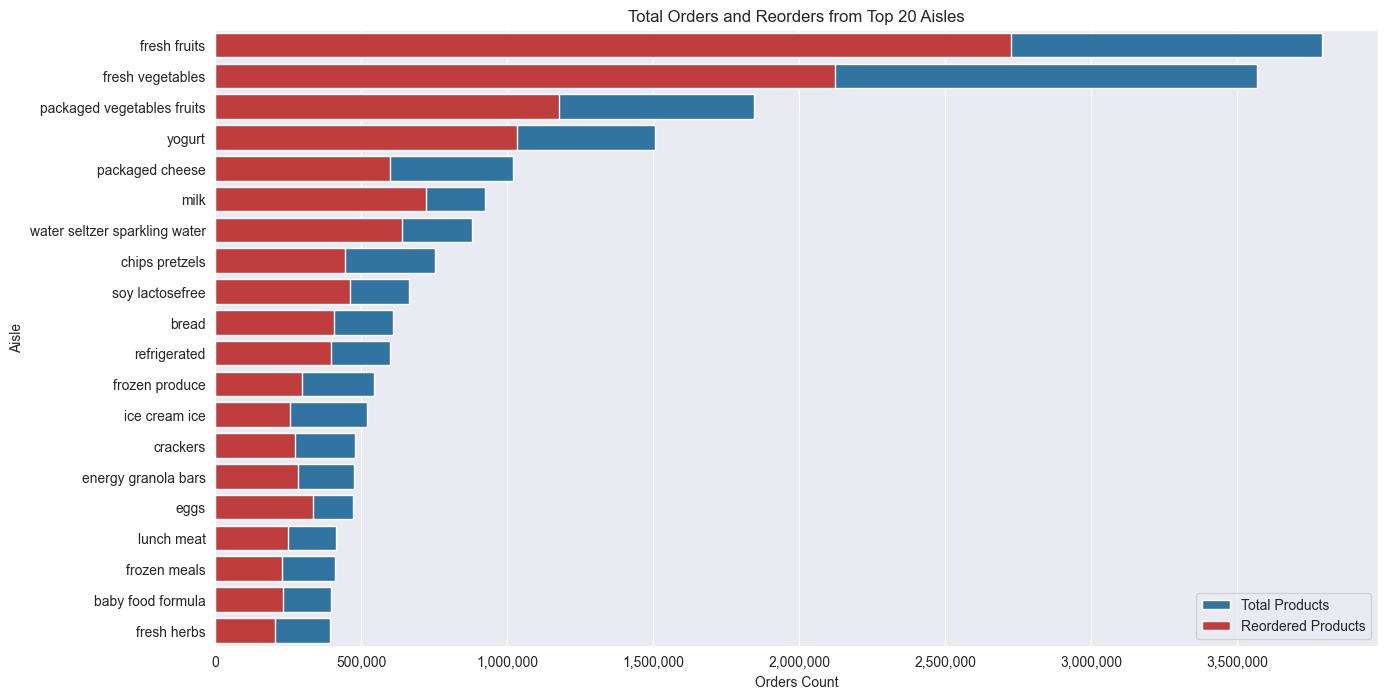

In [44]:
fig,ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(y='aisle',x='total',data=df.iloc[:20],color=color[0],label='Total Products')
ax = sns.barplot(y='aisle',x='reordered',data=df.iloc[:20],color=color[3],label='Reordered Products')
ax.set_xlabel("Orders Count")
ax.set_ylabel("Aisle")
ax.set_title("Total Orders and Reorders from Top 20 Aisles")
ax = plt.gca()
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ','))) # This the code that adds commas to the x-axis so that I get the x-axis in the format of 1,000,000
ax.legend()
plt.show()

In [45]:
df["reorder_ratio"] = df['reordered']/df['total']
df = df.sort_values(by="reorder_ratio",ascending=False).reset_index()

In [46]:
df

,index,aisle,total,reordered,reorder_ratio
0,5,milk,923659,722128,0.781812
1,6,water seltzer sparkling water,878150,640988,0.729930
2,0,fresh fruits,3792661,2726251,0.718823
3,15,eggs,472009,333408,0.706359
4,8,soy lactosefree,664493,460069,0.692361
...,...,...,...,...,...
129,132,beauty,6455,1374,0.212858
130,125,first aid,11411,2235,0.195864
131,128,kitchen supplies,9620,1874,0.194802
132,108,baking supplies decor,24786,4154,0.167595


Top 20 aisles with the highest reorder ratio

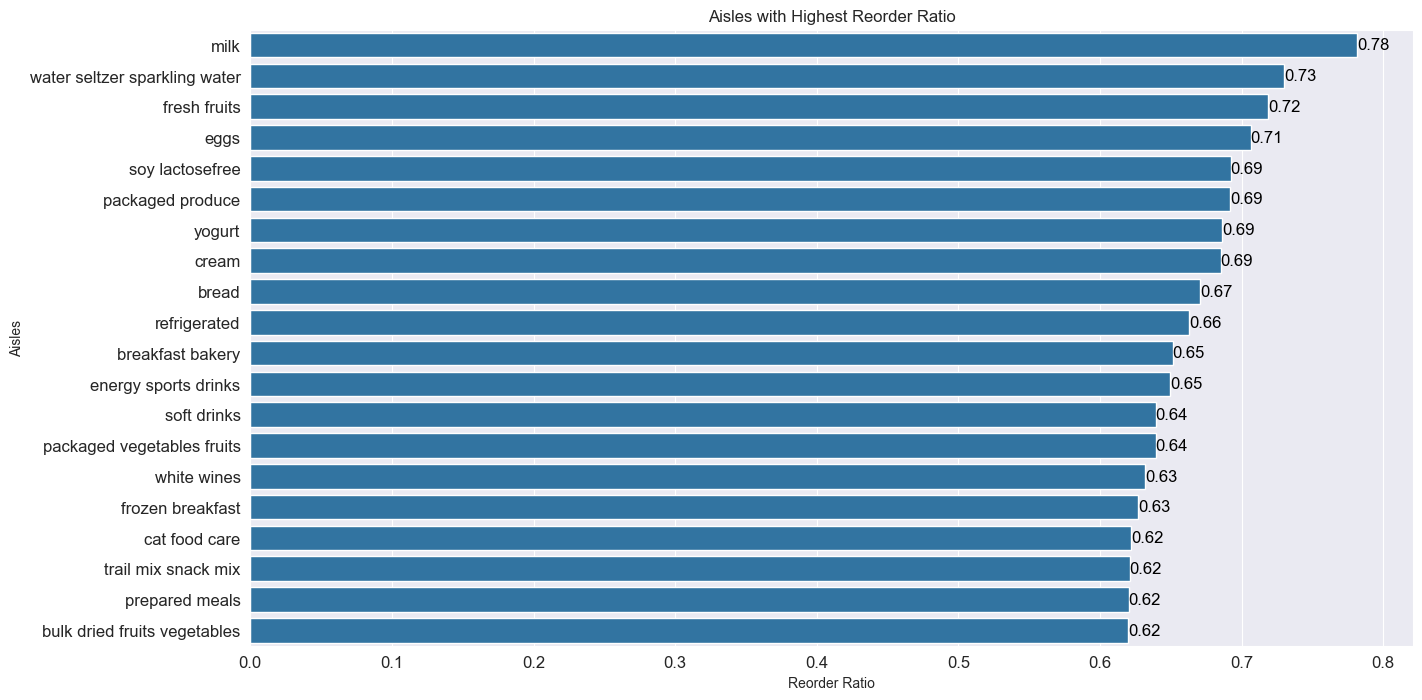

In [59]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = 'aisle', x = 'reorder_ratio',data=df.iloc[:20], color=color[0])
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=12, color='black')
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

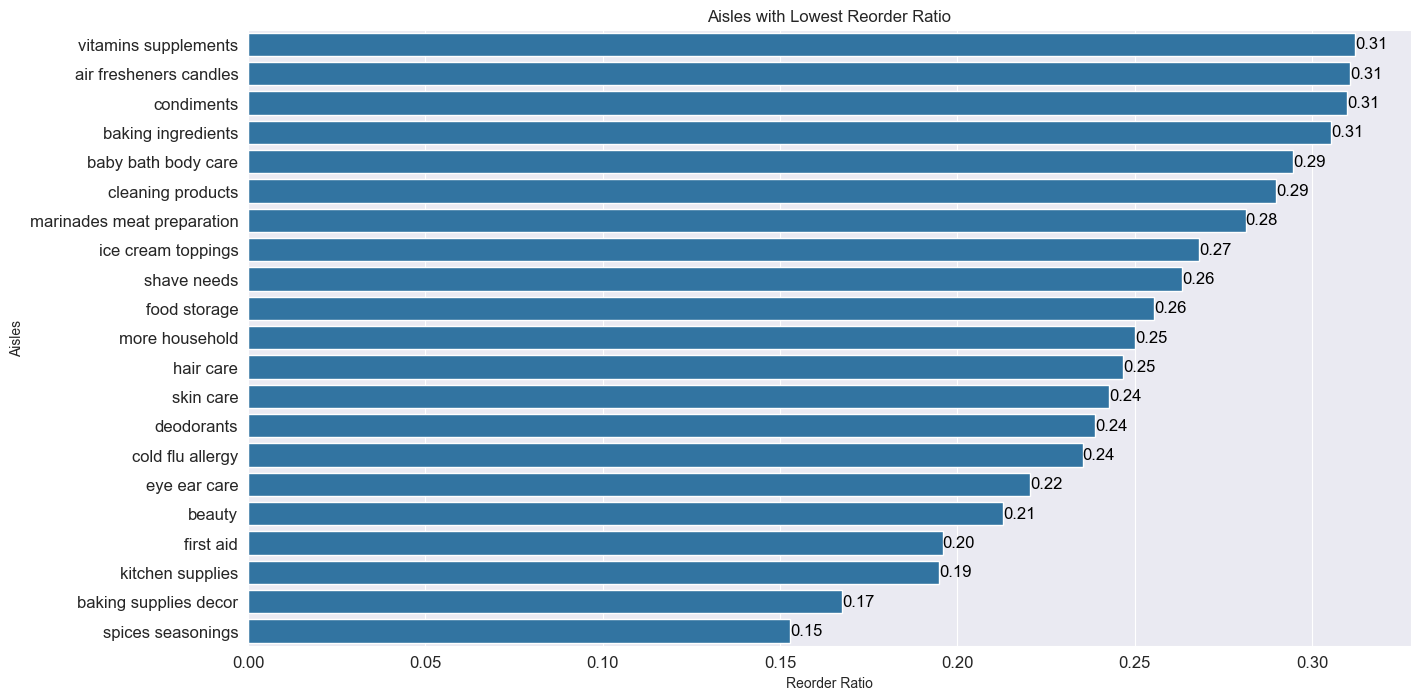

In [88]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = 'aisle', x = 'reorder_ratio',data=df.iloc[-21:], color=color[0])
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=12, color='black')
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Lowest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

Departments

In [79]:
temp_df = data.groupby("department")['reordered'].agg(['count','sum']).rename(columns={'count':'total','sum':'reordered'})
temp_df = temp_df.sort_values(by='total',ascending=False).reset_index()

Total Orders and Reorders form Departments

In [80]:
temp_df

,department,total,reordered
0,produce,9888378,6432596
1,dairy eggs,5631067,3773723
2,snacks,3006412,1727075
3,beverages,2804175,1832952
4,frozen,2336858,1268058
5,pantry,1956819,679799
6,bakery,1225181,769880
7,canned goods,1114857,511317
8,deli,1095540,666231
9,dry goods pasta,905340,418466


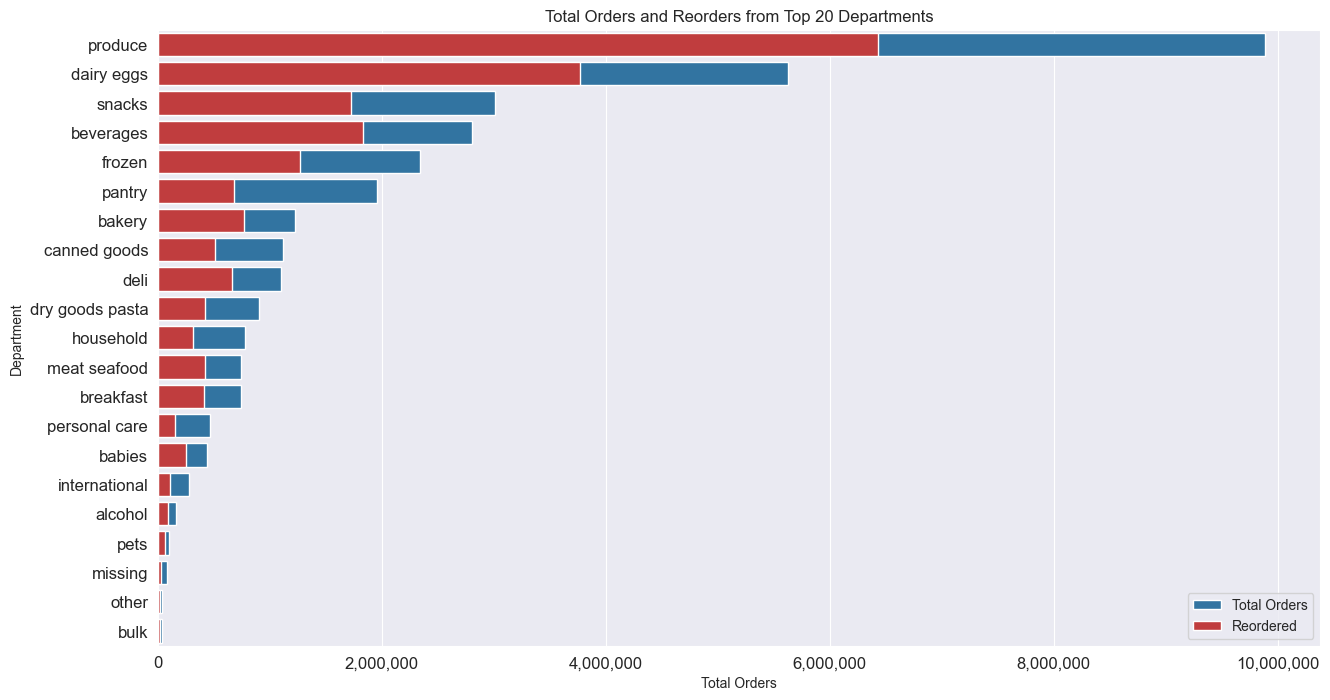

In [81]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = 'department', x = 'total',data=temp_df.iloc[:], color=color[0],label='Total Orders')
ax = sns.barplot(y = 'department', x = 'reordered',data=temp_df.iloc[:], color=color[3],label='Reordered')
ax = plt.gca()
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ','))) # This the code that adds commas to the x-axis so that I get the x-axis in the format of 1,000,000
ax.set_ylabel("Department")
ax.set_xlabel("Total Orders")
ax.set_title("Total Orders and Reorders from Top 20 Departments")
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(loc=4)
plt.show()

Department with Highest Reorder Ratio

In [82]:
temp_df["reorder_ratio"] = temp_df["reordered"]/temp_df["total"]
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

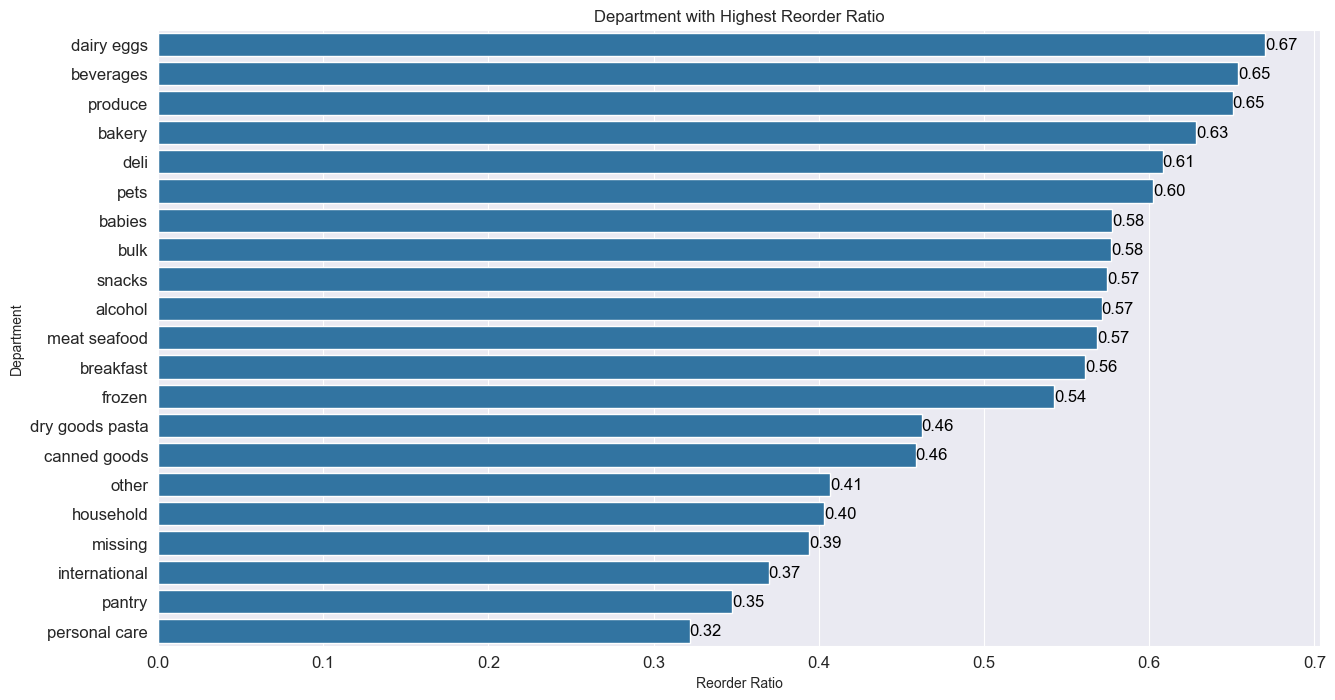

In [87]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = 'department', x = 'reorder_ratio',data=temp_df.iloc[:], color=color[0])
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=12, color='black')
ax.set_ylabel("Department")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Department with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [89]:
data.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')

Products

In [10]:
temp_df = data.groupby("product_name")['reordered'].agg(['count','sum']).rename(columns={'count':'total','sum':'reordered'})
temp_df = temp_df.sort_values(by='total',ascending=False).reset_index() 

In [11]:
temp_df

,product_name,total,reordered
0,Banana,491291,415166
1,Bag of Organic Bananas,394930,329275
2,Organic Strawberries,275577,214448
3,Organic Baby Spinach,251705,194939
4,Organic Hass Avocado,220877,176173
...,...,...,...
49680,Greek Blended Cherry Fat Free Yogurt,1,0
49681,All Natural Stevia Liquid Extract Sweetener,1,0
49682,"Frittata, Farmer's Market",1,0
49683,Max White With Polishing Star Soft Toothbrush,1,0


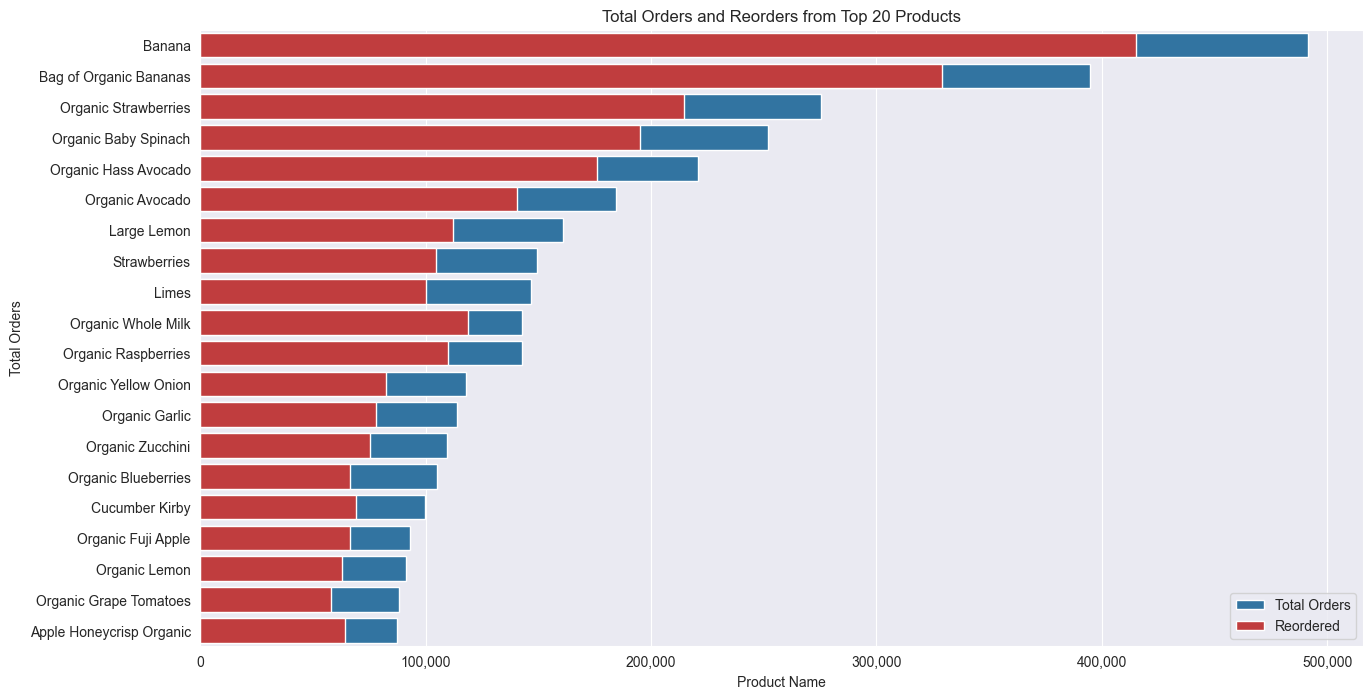

In [94]:
fig,ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(y = 'product_name',x = 'total',data=temp_df.iloc[:20],color=color[0],label='Total Orders')
ax = sns.barplot(y = 'product_name',x = 'reordered',data=temp_df.iloc[:20],color=color[3],label='Reordered')
ax.set_xlabel("Product Name")
ax.set_ylabel("Total Orders")
ax.set_title("Total Orders and Reorders from Top 20 Products")
ax = plt.gca()
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ','))) # This the code that adds commas to the x-axis so that I get the x-axis in the format of 1,000,000
ax.legend()
plt.show()

In [12]:
temp_df["reorder_ratio"] = temp_df["reordered"]/temp_df["total"]    
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

In [13]:
temp_df

,index,product_name,total,reordered,reorder_ratio
0,23853,Raw Veggie Wrappers,69,65,0.942029
1,21388,Serenity Ultimate Extrema Overnight Pads,90,84,0.933333
2,40147,Orange Energy Shots,13,12,0.923077
3,20296,Chocolate Love Bar,102,94,0.921569
4,30746,Soy Powder Infant Formula,35,32,0.914286
...,...,...,...,...,...
49680,39309,"SweeTarts, Laffy Taffy, Nerds, and Bottle Caps...",14,0,0.000000
49681,46282,Sugar Free Hot Fudge Topping,6,0,0.000000
49682,46283,Hardwood Smoked Sliced Turkey Breast,6,0,0.000000
49683,46284,Coconut Body Wash,6,0,0.000000


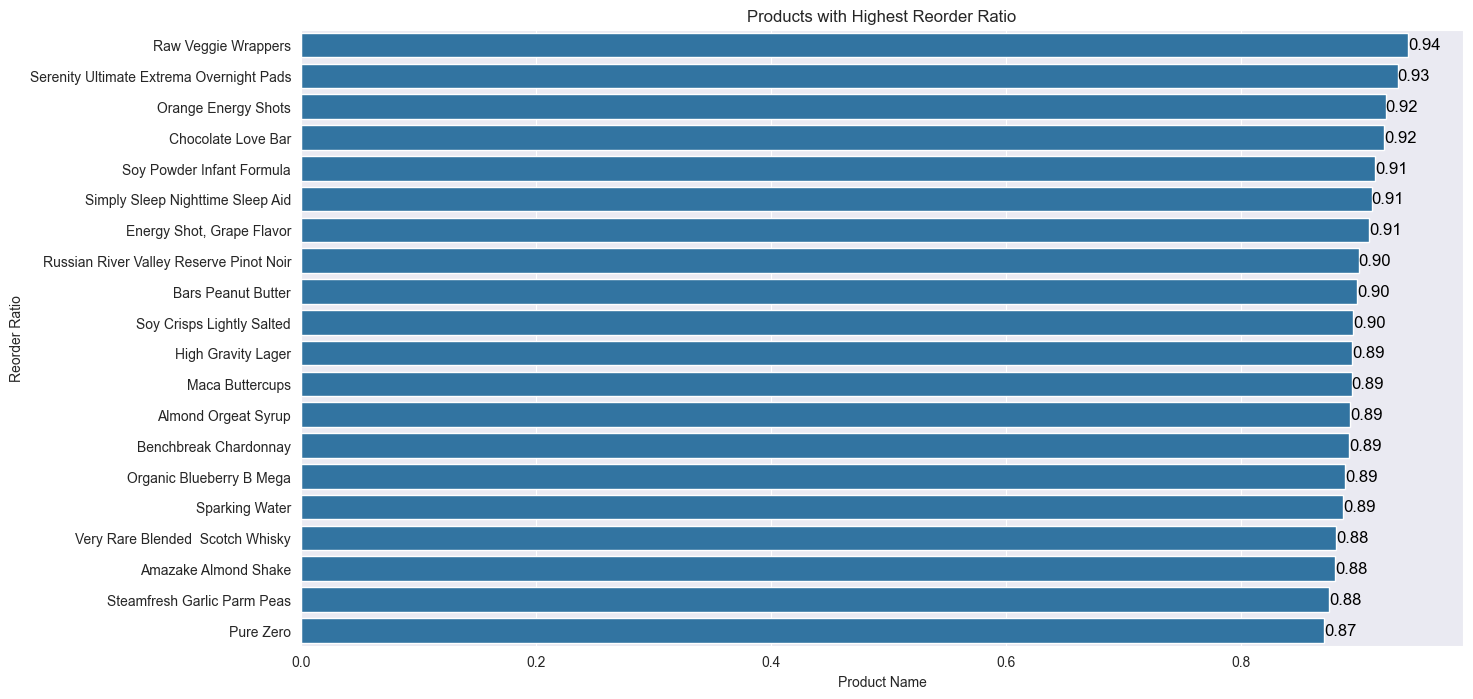

In [97]:
fig,ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(y = 'product_name',x = 'reorder_ratio',data=temp_df.iloc[:20],color=color[0])
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=12, color='black')
ax.set_xlabel("Product Name")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Products with Highest Reorder Ratio")
plt.show()

Product_users

In [7]:
product_unique_users = data.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users = product_unique_users.sort_values('total_users', ascending = False)

In [14]:
product_unique_users = product_unique_users.merge(temp_df, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head(20)

,product_name,total_users,index,total,reordered,reorder_ratio
47597,Raw Veggie Wrappers,4,23853,69,65,0.942029
44671,Serenity Ultimate Extrema Overnight Pads,6,21388,90,84,0.933333
49643,Orange Energy Shots,1,40147,13,12,0.923077
40877,Chocolate Love Bar,8,20296,102,94,0.921569
48869,Soy Powder Infant Formula,3,30746,35,32,0.914286
47291,Simply Sleep Nighttime Sleep Aid,4,28078,45,41,0.911111
49397,"Energy Shot, Grape Flavor",2,35213,22,20,0.909091
48785,Russian River Valley Reserve Pinot Noir,3,32316,30,27,0.900000
42771,Bars Peanut Butter,7,23918,69,62,0.898551
42766,Soy Crisps Lightly Salted,7,24218,67,60,0.895522


In [15]:
product_unique_users.head(20)

,product_name,total_users,index,total,reordered,reorder_ratio
0,Banana,76125,0,491291,415166,0.845051
1,Bag of Organic Bananas,65655,1,394930,329275,0.833755
2,Organic Strawberries,61129,2,275577,214448,0.778178
3,Organic Baby Spinach,56766,3,251705,194939,0.774474
4,Large Lemon,48614,6,160792,112178,0.697659
5,Limes,46658,8,146660,100002,0.681863
6,Strawberries,44857,7,149445,104588,0.699843
7,Organic Hass Avocado,44704,4,220877,176173,0.797607
8,Organic Avocado,43954,5,184224,140270,0.761410
9,Organic Blueberries,38720,14,105026,66306,0.631329


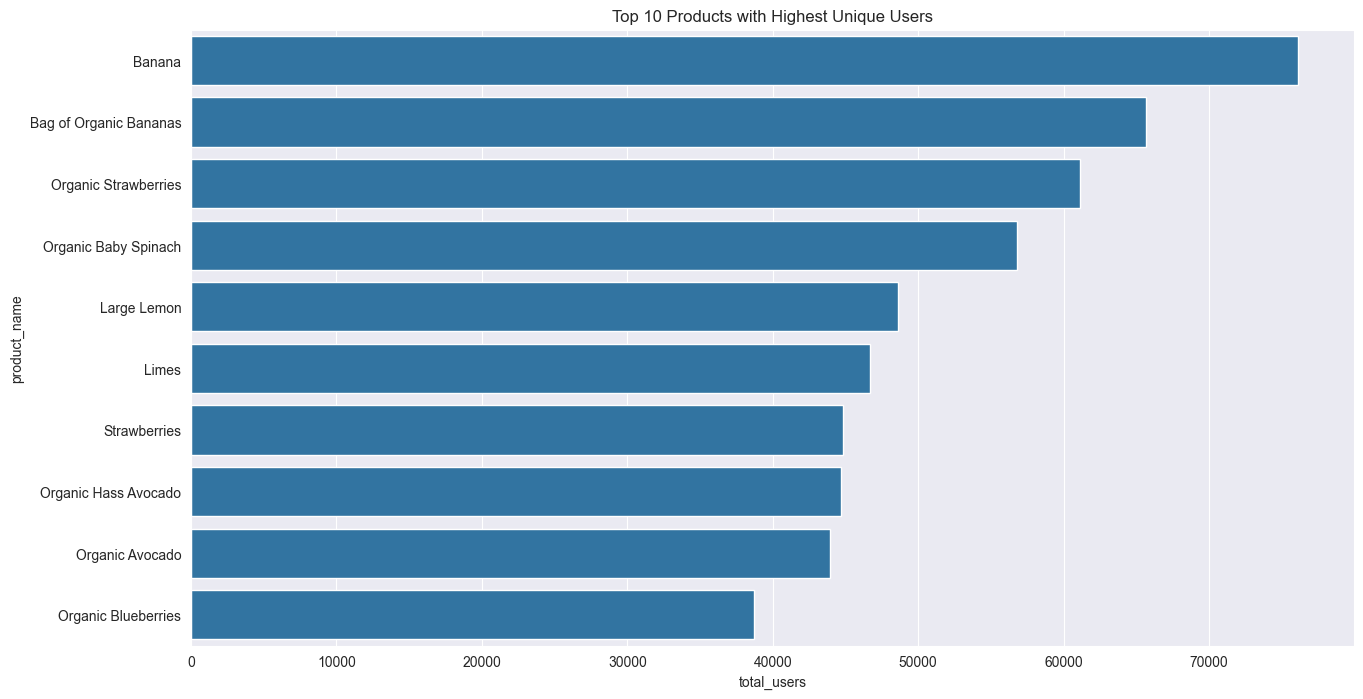

In [110]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = 'product_name', x = 'total_users',data=product_unique_users.iloc[:10], color=color[0])
ax.set_title("Top 10 Products with Highest Unique Users")
plt.show()

### **Cumulative Sum of Unique Users Per Product**


The **cumulative sum of unique users per product** represents the running total of distinct users who have interacted with a product over time, typically measured on a daily, weekly, or monthly basis. This metric helps us understand how the number of users engaging with a product grows cumulatively, providing insights into user adoption or engagement trends.

### Key Insights from the Cumulative Sum of Unique Users Per Product:
1. **User Growth Over Time**: It shows the total count of unique users over a period, highlighting how quickly the product is attracting new users.
   
2. **User Retention**: By comparing the cumulative sum with previous periods, you can infer how well the product retains users and whether new users are returning over time.
   
3. **Engagement Trends**: If the cumulative sum increases steadily, it indicates consistent user interest. If there are sudden spikes or plateaus, it can signal specific events (e.g., product launches, promotions) or a lack of engagement.
   
4. **Product Adoption**: This metric can help gauge the product's adoption rate. A steep increase suggests rapid adoption, while a slow increase could suggest challenges in attracting users.
   
5. **Long-term Value**: It can also show the long-term value and sustainability of the product by tracking how many distinct users continue to interact with it over time.

In summary, the cumulative sum of unique users per product helps to track the product’s growth trajectory, user retention, and overall engagement.

In [16]:
product_unique_users['cuml_users'] = product_unique_users['total_users'].cumsum()
product_unique_users = product_unique_users.reset_index(drop=True)
product_unique_users.head()

,product_name,total_users,index,total,reordered,reorder_ratio,cuml_users
0,Banana,76125,0,491291,415166,0.845051,76125
1,Bag of Organic Bananas,65655,1,394930,329275,0.833755,141780
2,Organic Strawberries,61129,2,275577,214448,0.778178,202909
3,Organic Baby Spinach,56766,3,251705,194939,0.774474,259675
4,Large Lemon,48614,6,160792,112178,0.697659,308289


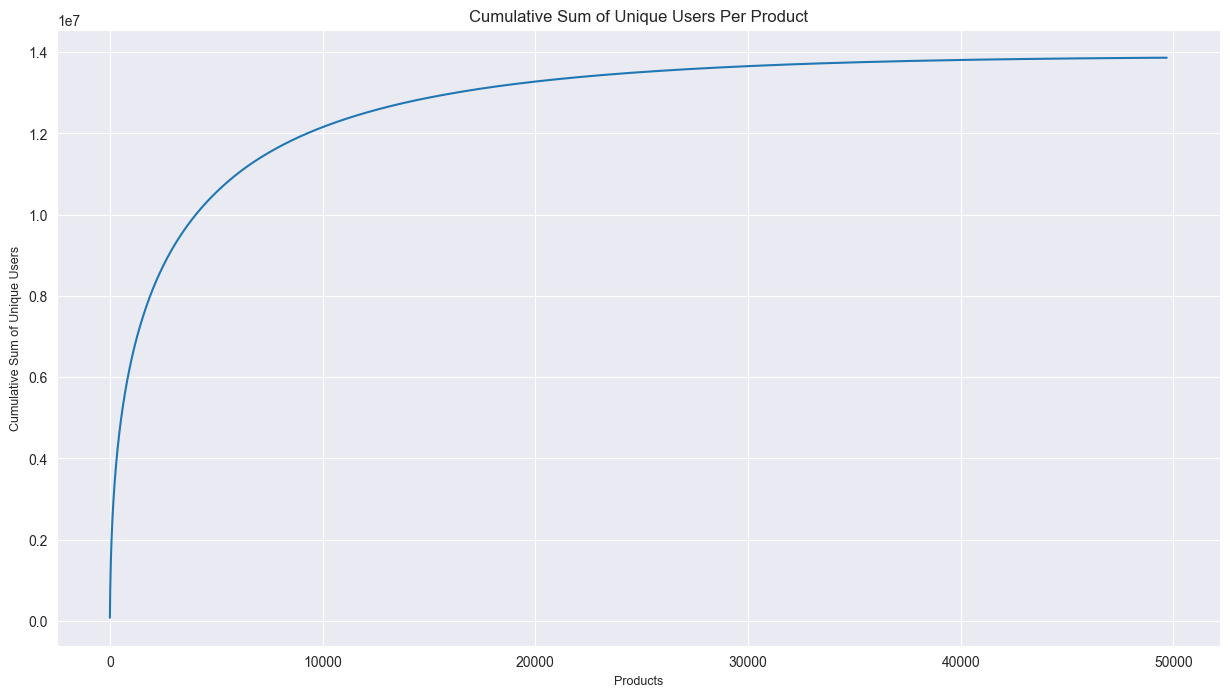

In [113]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x = product_unique_users['cuml_users'].index, y=product_unique_users['cuml_users'].values)
ax.set_xlabel("Products", size = 9)
ax.set_ylabel("Cumulative Sum of Unique Users", size = 9)
ax.set_title("Cumulative Sum of Unique Users Per Product", size = 12)
plt.show()

The **Total Products Orders vs. Total Unique Product Buyers** graph typically represents the relationship between the number of product orders placed and the number of unique buyers for those products over a certain time period.

### What the graph shows:

1. **Total Product Orders**: This refers to the total number of times products were ordered. It includes all orders, even if the same product was ordered multiple times by the same or different customers.
   
2. **Total Unique Product Buyers**: This refers to the number of unique individuals or customers who have bought a product. Each buyer is counted only once, regardless of how many products they have purchased.

### Key Insights from the Graph:

1. **Demand vs. Reach**: The graph helps visualize how many total orders were made compared to how many distinct buyers are responsible for those orders. A large number of orders but relatively few unique buyers could indicate that existing customers are purchasing repeatedly, while a large number of unique buyers but fewer orders might suggest that customers are only making one-time purchases.

2. **Customer Retention**: If the number of total product orders is consistently higher than the number of unique buyers, it suggests that repeat purchases from the same customers are occurring, which may indicate strong customer loyalty or retention.

3. **Product Popularity**: A higher number of unique buyers with a steady number of product orders could indicate that a product is being bought by a large base of customers, suggesting good market reach.

4. **Sales Performance**: Comparing the two variables helps understand the sales performance from both the quantity and customer engagement perspective. It shows whether growth is driven by an increasing number of customers or repeat purchases from the same buyers.

5. **Product Strategy**: The graph can help businesses strategize by highlighting the potential need for customer retention programs (if many orders come from repeat buyers) or marketing efforts to attract new customers (if there are many unique buyers but fewer orders).

### Example of Graph Interpretation:

- If the graph shows **many total orders** but relatively **fewer unique buyers**, this could indicate high **customer retention** or that **a small group of loyal customers** is repeatedly purchasing the product.
- If the graph shows a **higher number of unique buyers** with a **lower number of total orders**, this may imply that **many different customers** are trying the product but not purchasing it frequently.

This graph is useful in analyzing **sales trends**, **customer behavior**, and **product popularity**.

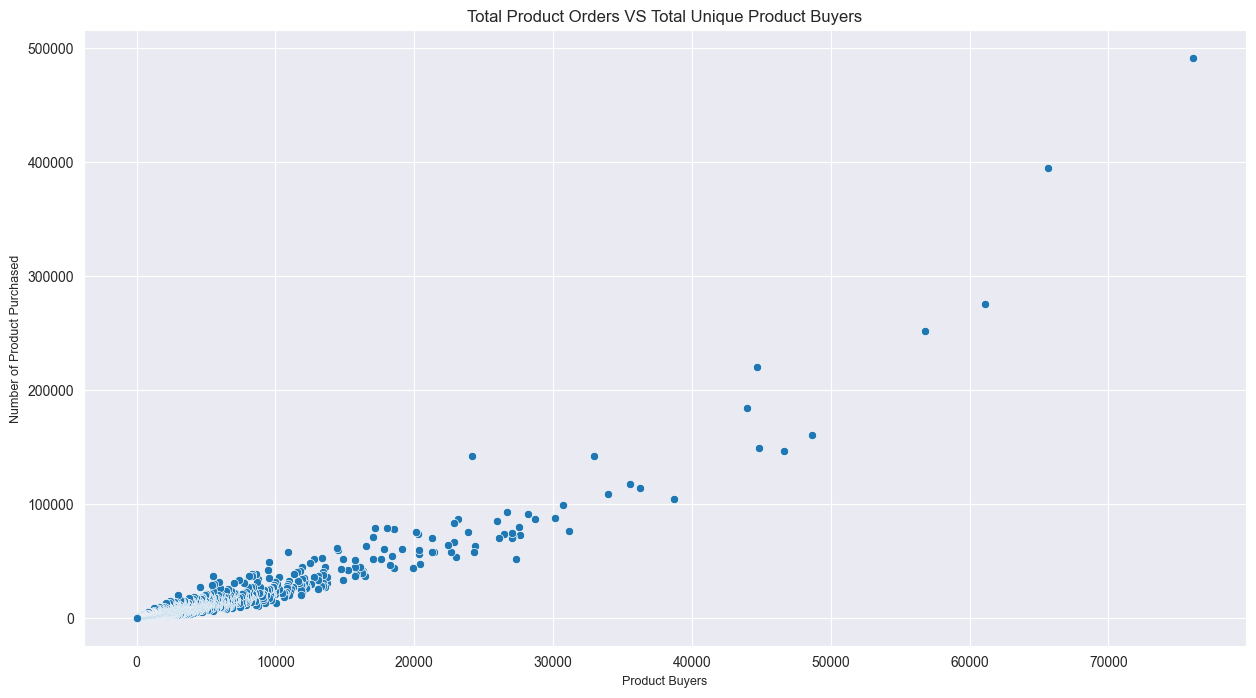

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(y = product_unique_users["total"], x = product_unique_users["total_users"])
ax.set_xlabel("Product Buyers", size = 9)
ax.set_ylabel("Number of Product Purchased", size = 9)
ax.set_title("Total Product Orders VS Total Unique Product Buyers", size = 12)
plt.show()

Reorder Percentage us Total Unique Users 

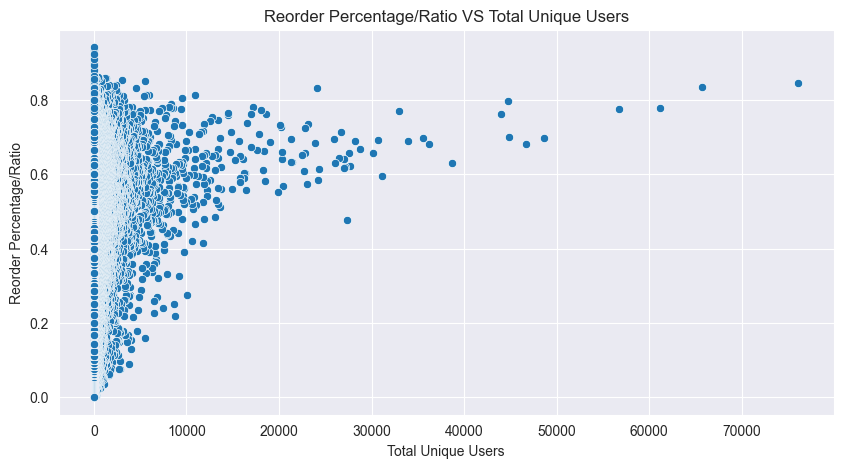

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total_users, y = product_unique_users.reorder_ratio, color = color[0])
ax.set_xlabel("Total Unique Users")
ax.set_ylabel("Reorder Percentage/Ratio")
ax.set_title("Reorder Percentage/Ratio VS Total Unique Users")
plt.show()

Reorder Percentage VS Total Orders

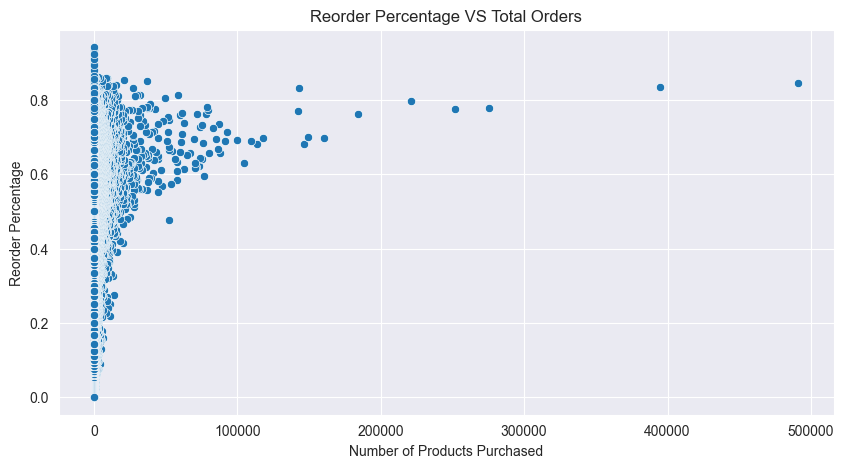

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total, y = product_unique_users.reorder_ratio)
ax.set_xlabel("Number of Products Purchased")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Orders")
plt.show()

Add to Cart Order VS Reorder Ratio

Assumption : Here I am considering the add_to_cart_order field to be the sequence in which they are added to the cart by the customer.

In [31]:
data['add_to_cart_order'].value_counts()

add_to_cart_order
1      3346083
2      3182490
3      2988129
4      2773069
5      2542770
        ...   
141          1
142          1
143          1
144          1
145          1
Name: count, Length: 145, dtype: int64

In [35]:
temp_df = data.groupby('add_to_cart_order')['reordered'].mean().reset_index()
temp_df.head(10)

,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598
5,6,0.600603
6,7,0.585810
7,8,0.573495
8,9,0.561681
9,10,0.551450


In [34]:
temp_df.shape

(145, 2)

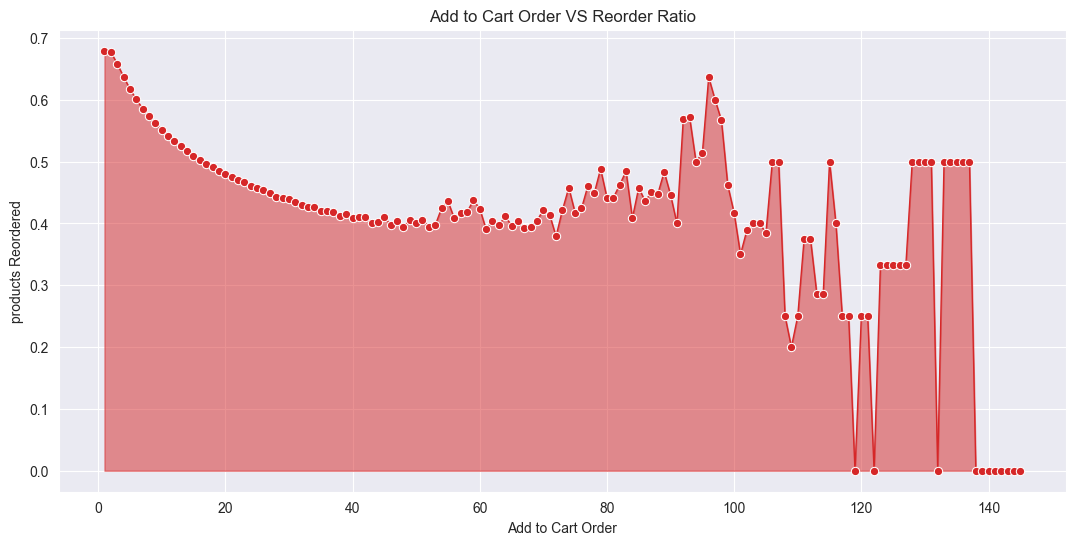

In [46]:
fig, ax = plt.subplots(figsize=(13,6))
sns.lineplot(x=temp_df.add_to_cart_order, y=temp_df.reordered, lw = 1, marker='o',color=color[3], ax=ax)
ax.fill_between(temp_df.add_to_cart_order, temp_df.reordered, color=color[3], alpha=0.5, label='Area')
ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("products Reordered")
ax.set_title("Add to Cart Order VS Reorder Ratio")
plt.show()

Day of Week to Specific Products

In [15]:
temp_df = data.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False]) # Sorting the values
temp_df.head(20)

,order_dow,product_name,counts
3418,0,Banana,101474
3224,0,Bag of Organic Bananas,75052
26887,0,Organic Baby Spinach,57556
29843,0,Organic Strawberries,56635
28284,0,Organic Hass Avocado,45841
26852,0,Organic Avocado,41877
20880,0,Large Lemon,35826
21826,0,Limes,31878
40111,0,Strawberries,29046
29311,0,Organic Raspberries,27756


#### Most Popular Products on different days

In [6]:
temp_df = data.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)

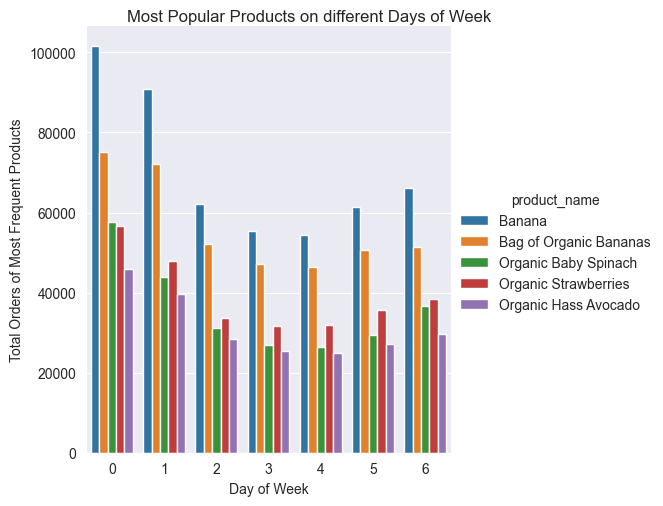

In [8]:
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=temp_df, kind="bar")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")

In [13]:
data.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')